# Imports

In [1]:
%load_ext autoreload

In [2]:
import numpy as np
from src import *

%autoreload 2

# Signal

In [3]:
# Signal width
N = 128

# Sparse signal parameters
sparse_range = (-6, 6)
density = 0.005

# Smooth signal parameters
smooth_amplitude = 2
sigmas_range = (2e-2, 2e-1)
nb_gaussian = int(0.5 * N)

# Seed
seed = None

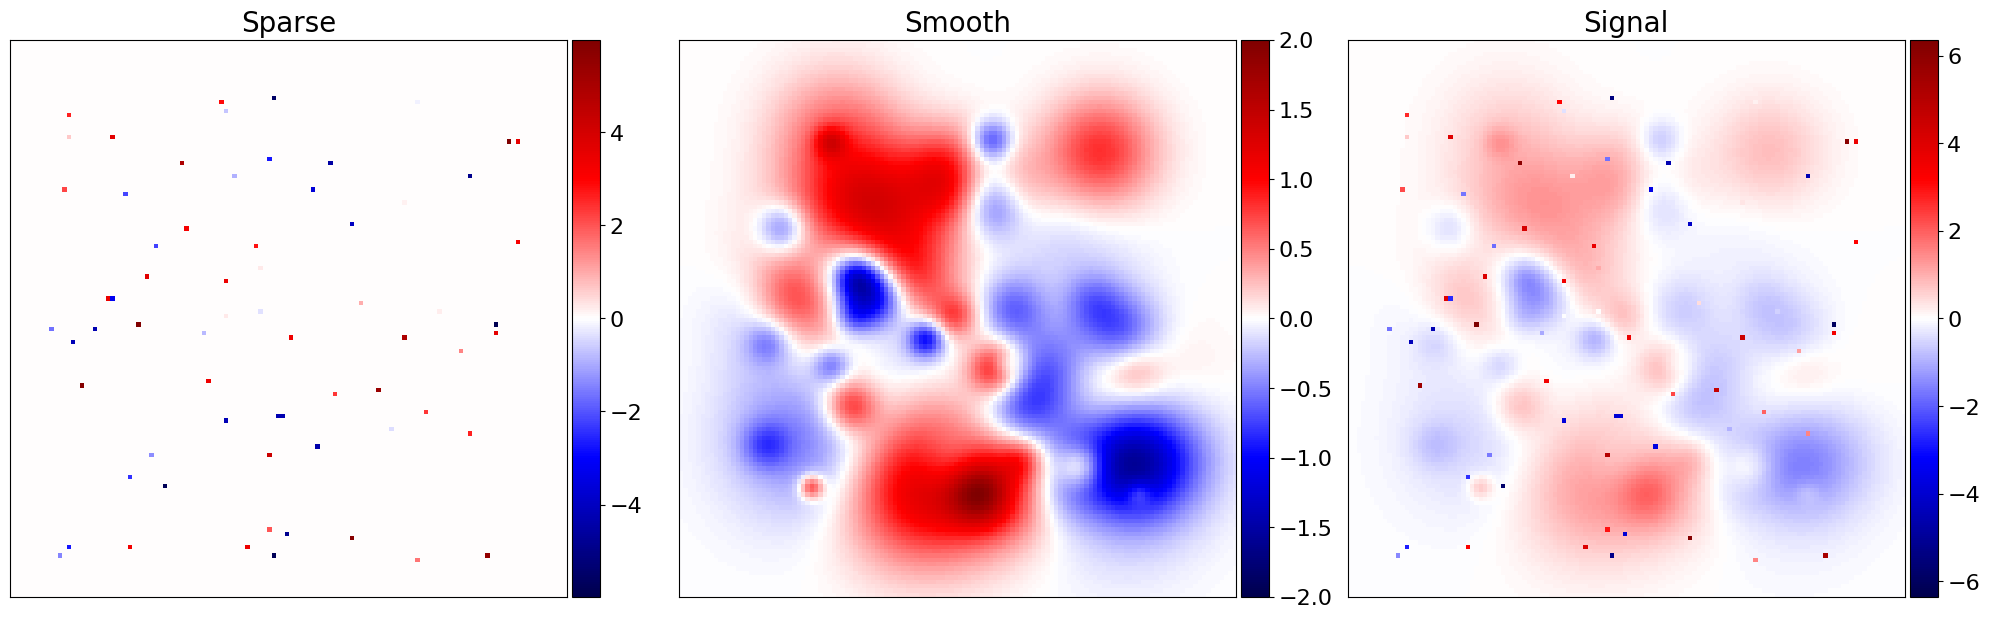

In [35]:
sparse_signal = compute_sparse(N, sparse_range, density, seed)
smooth_signal = compute_smooth(N, smooth_amplitude, sigmas_range, nb_gaussian, seed)

signal = sparse_signal + smooth_signal

plot_signal(sparse_signal, smooth_signal);

# Operator $\phi$

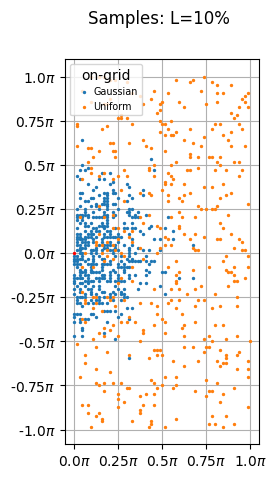

In [5]:
L = 0.1
theta = 0.5
op = NuFFT(N, L, theta, on_grid=True, seed=seed)

x0 = signal.reshape(-1)
y0 = op(x0)

psnr = 50
y = compute_y(y0, psnr)

op.plot_samples()

# Solver

In [6]:
# Loss weights
lambda1 = 1e-2
lambda2 = 5e-2

# Use Laplacian ?
laplacian = True

### Coupled

In [41]:
coupled = True

x1, x2 = solve(y, op, lambda1, lambda2, coupled, laplacian)

Coupled
INFO -- [2023-12-17 12:18:48.010094] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-12-17 12:19:11.598959] Iteration 500
	iteration: 500
	N_iter: 501.0
	RelError[x]: 0.0003550025795399097
INFO -- [2023-12-17 12:19:17.044941] Iteration 618
	iteration: 618
	N_iter: 619.0
	RelError[x]: 9.918569974692882e-05
INFO -- [2023-12-17 12:19:17.046148] Stopping Criterion satisfied -> END


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x15a01f460>


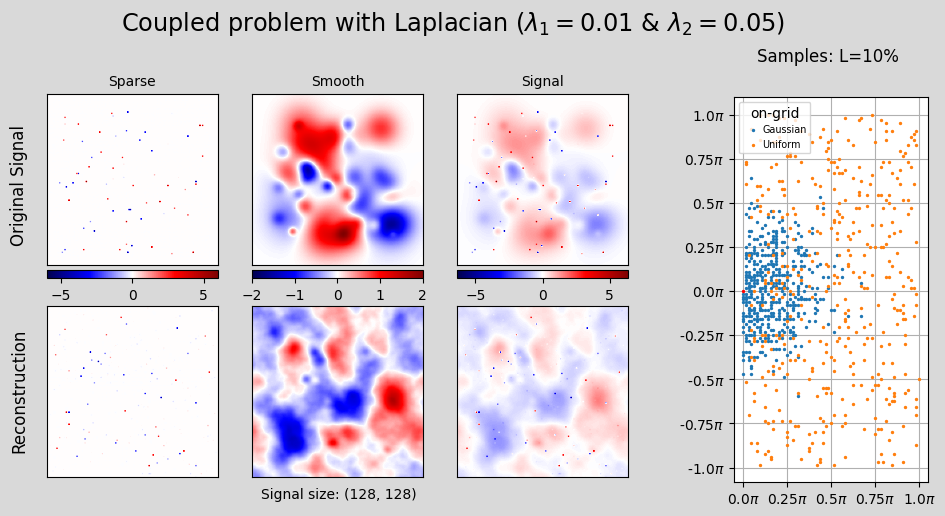

Button(description='SAVE', style=ButtonStyle())

Output()

In [42]:
sparse_rcstr_coupled, smooth_rcstr_coupled, signal_rcstr_coupled = map(
    lambda x: x.reshape((N,N)), (x1, x2, x1 + x2)
)

fig = plot_results(
    [sparse_signal, smooth_signal],
    [sparse_rcstr_coupled, smooth_rcstr_coupled],
    lambda1,
    lambda2,
    op,
    coupled,
    laplacian
)

save_widget(fig, lambda1, lambda2, op, psnr, coupled)

### Decoupled

In [51]:
coupled = False

x1_, x2_ = solve(y, op, lambda1, lambda2, coupled, laplacian)

Decoupled
Co-Gram Identity
INFO -- [2023-12-17 12:22:14.920796] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-12-17 12:22:16.308466] Iteration 161
	iteration: 161
	N_iter: 162.0
	RelError[x]: 9.603826078945911e-05
INFO -- [2023-12-17 12:22:16.309417] Stopping Criterion satisfied -> END


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x159ff4e20>


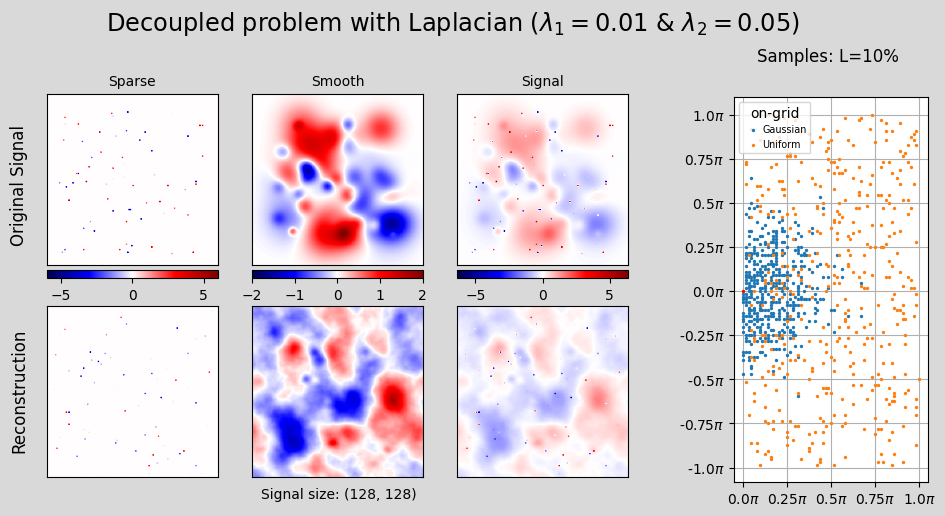

Button(description='SAVE', style=ButtonStyle())

Output()

In [52]:
sparse_rcstr_decoupled, smooth_rcstr_decoupled, signal_rcstr_decoupled = map(
    lambda x: x.reshape((N,N)), (x1_, x2_, x1_ + x2_)
)

fig = plot_results(
    [sparse_signal, smooth_signal],
    [sparse_rcstr_decoupled, smooth_rcstr_decoupled],
    lambda1,
    lambda2,
    op,
    coupled,
    laplacian
)

save_widget(fig, lambda1, lambda2, op, psnr, coupled)

les 6 reconstructions 
time
les différences smooth
                sparse - off peaks
                       - on peaks 

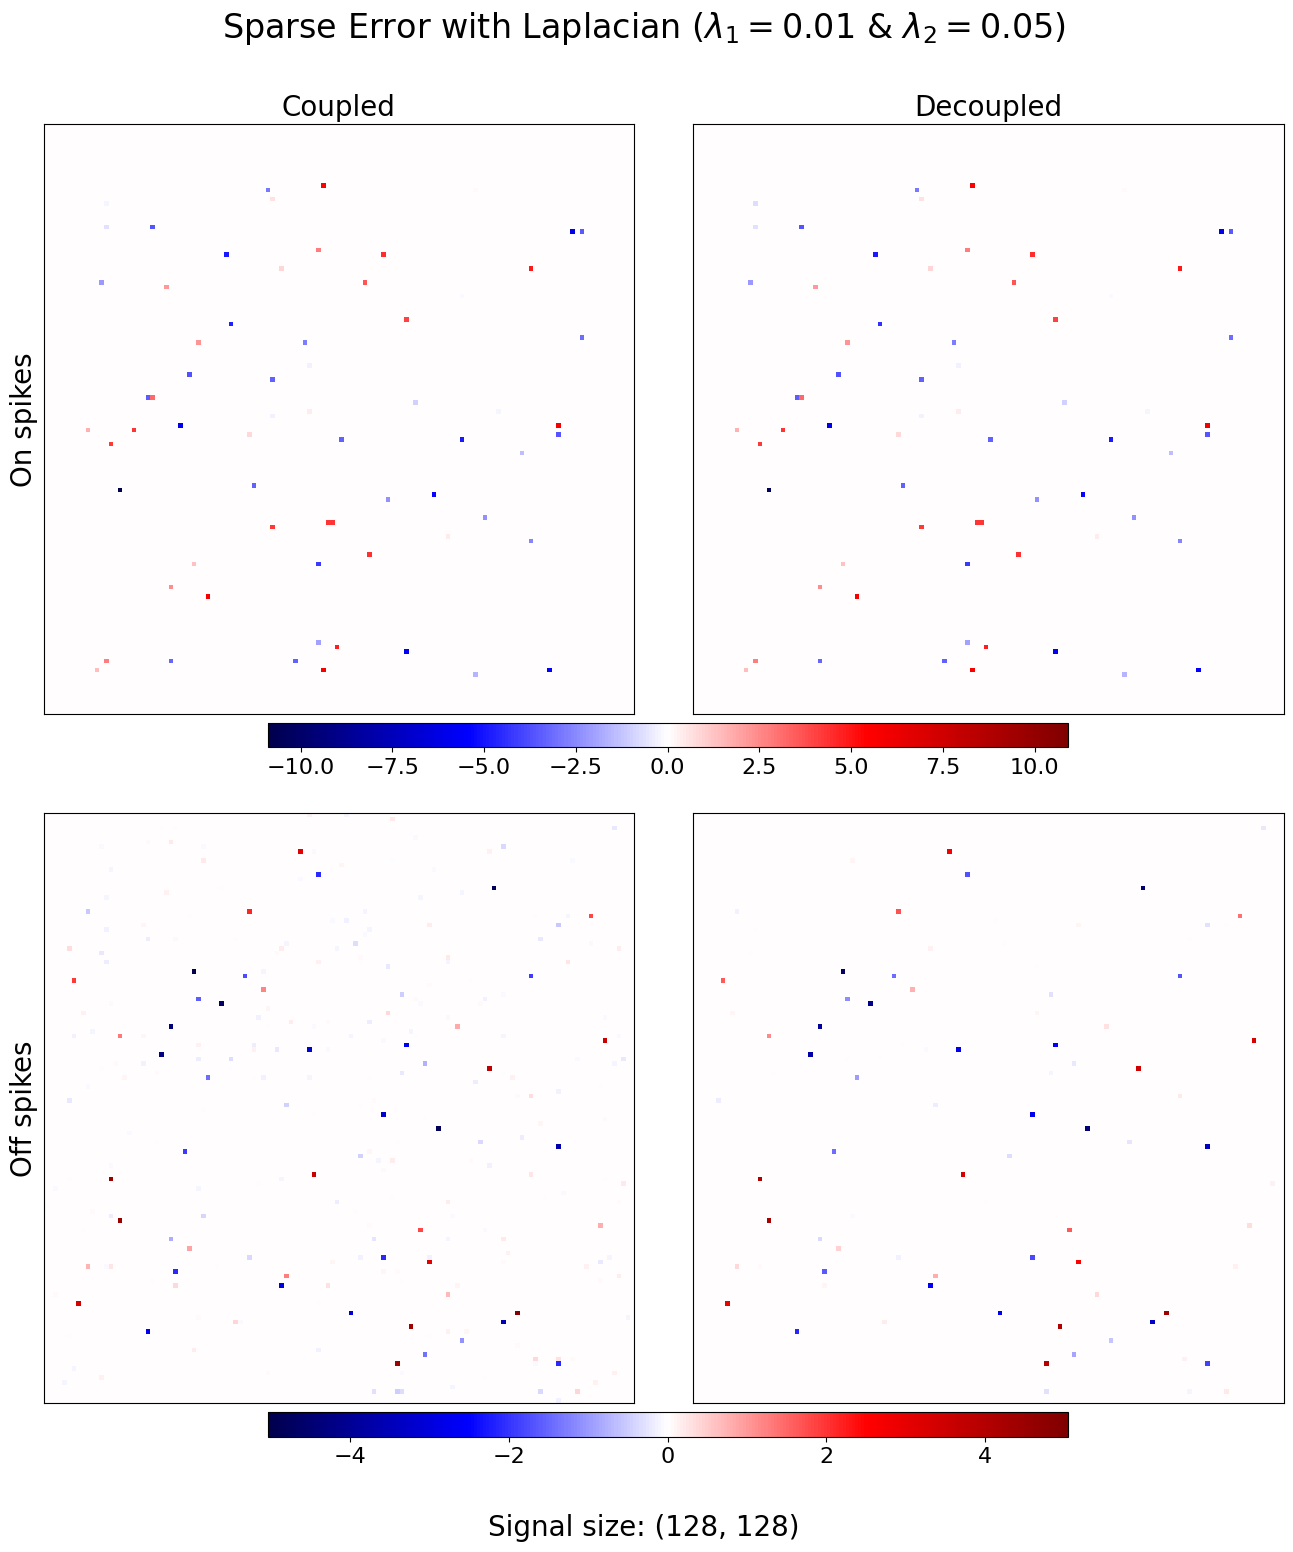

In [47]:
sparse_error(
    N,
    laplacian,
    lambda1,
    lambda2,
    sparse_signal,
    sparse_rcstr_coupled,
    sparse_rcstr_decoupled,
)
print()

evaluer cost function
temps de reconstruction (fixe taille image, lambda, 10 operations, ensuite varier taille image (512, si marche pas 256))

mettre image côte à côte (chaque taille) avec diff

In [14]:
laplacian = Laplacian((op.N, op.N), mode="wrap")
#objective_func(op,laplacian,y,sparse_rcstr )

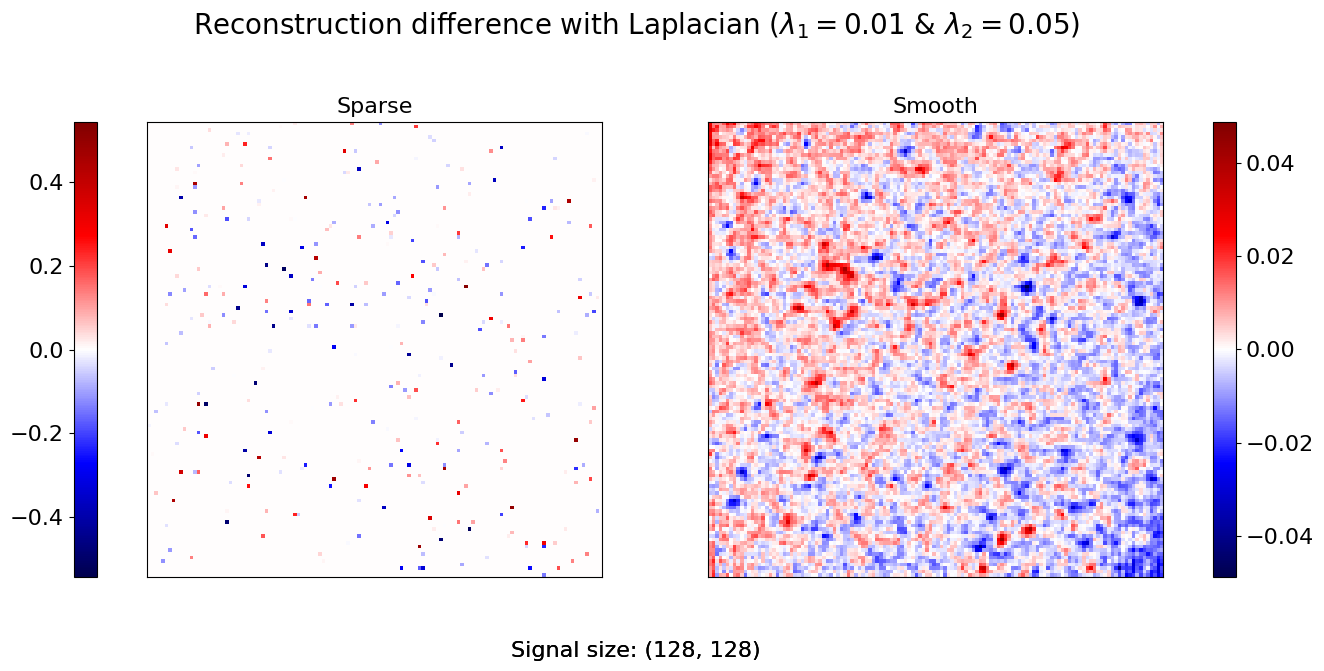

In [15]:
difference(    N,
    laplacian,
    lambda1,
    lambda2,
    sparse_rcstr_coupled,
    sparse_rcstr_decoupled,
    smooth_rcstr_coupled,
    smooth_rcstr_decoupled,);

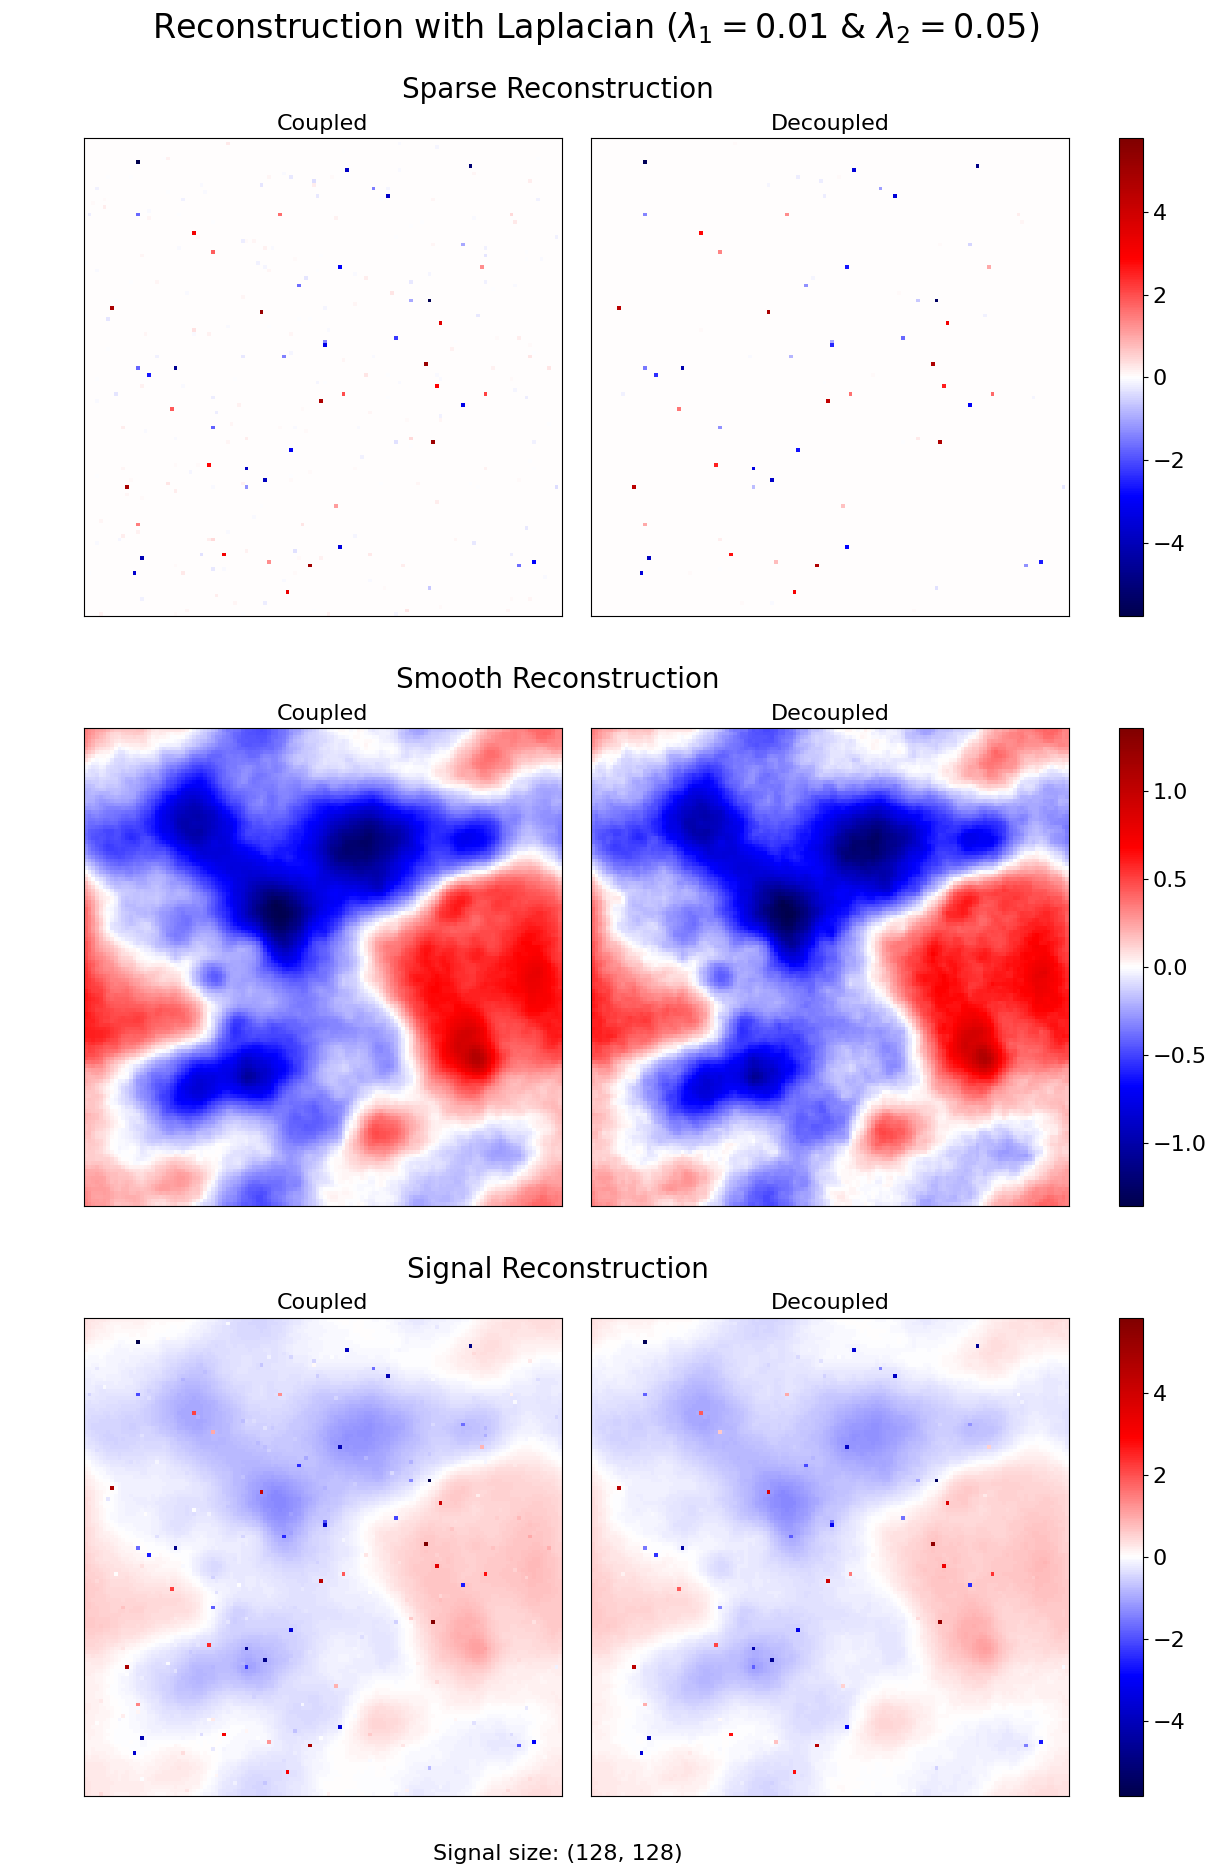

In [15]:
laplacian = True
compare(
    N,
    laplacian,
    lambda1,
    lambda2,
    sparse_rcstr_coupled,
    sparse_rcstr_decoupled,
    smooth_rcstr_coupled,
    smooth_rcstr_decoupled,
    signal_rcstr_coupled,
    signal_rcstr_decoupled,
)
print()

In [56]:
import time

Coupled
INFO -- [2023-12-17 12:34:03.413369] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-12-17 12:34:11.665422] Iteration 500
	iteration: 500
	N_iter: 501.0
	RelError[x]: 0.0006485223602270379
INFO -- [2023-12-17 12:34:14.203613] Iteration 649
	iteration: 649
	N_iter: 650.0
	RelError[x]: 9.977335006961943e-05
INFO -- [2023-12-17 12:34:14.204537] Stopping Criterion satisfied -> END
Decoupled
Co-Gram Identity


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x15ea216c0>


INFO -- [2023-12-17 12:34:14.886602] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-12-17 12:34:15.579503] Iteration 168
	iteration: 168
	N_iter: 169.0
	RelError[x]: 9.427498996638793e-05
INFO -- [2023-12-17 12:34:15.580444] Stopping Criterion satisfied -> END


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x15eaf4e80>


Coupled
INFO -- [2023-12-17 12:34:18.418968] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-12-17 12:34:24.157785] Iteration 500
	iteration: 500
	N_iter: 501.0
	RelError[x]: 0.000937108309373166
INFO -- [2023-12-17 12:34:30.804307] Iteration 1_000
	iteration: 1000
	N_iter: 1001.0
	RelError[x]: 0.0005775711182801724
INFO -- [2023-12-17 12:34:36.899186] Iteration 1_500
	iteration: 1500
	N_iter: 1501.0
	RelError[x]: 0.00040404545142270966
INFO -- [2023-12-17 12:34:41.847426] Iteration 2_000
	iteration: 2000
	N_iter: 2001.0
	RelError[x]: 0.00031553030861406454
INFO -- [2023-12-17 12:34:48.091220] Iteration 2_500
	iteration: 2500
	N_iter: 2501.0
	RelError[x]: 0.0002719568300792362
INFO -- [2023-12-17 12:34:53.931352] Iteration 3_000
	iteration: 3000
	N_iter: 3001.0
	RelError[x]: 0.00022578372992536447
INFO -- [2023-12-17 12:34:59.783398] Iteration 3_500
	iteration: 3500
	N_iter: 3501.0
	RelError[x]: 0.00017220829140115652
INFO -- [2023-12-17 12:35:05.336095] Iteratio

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x161f8ee60>


INFO -- [2023-12-17 12:35:16.992629] Iteration 500
	iteration: 500
	N_iter: 501.0
	RelError[x]: 0.00021318346844628443
INFO -- [2023-12-17 12:35:17.314255] Iteration 614
	iteration: 614
	N_iter: 615.0
	RelError[x]: 9.956758006366701e-05
INFO -- [2023-12-17 12:35:17.315135] Stopping Criterion satisfied -> END


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x161fda200>


Coupled
INFO -- [2023-12-17 12:35:29.449222] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-12-17 12:35:37.635993] Iteration 500
	iteration: 500
	N_iter: 501.0
	RelError[x]: 0.0002792307149564381
INFO -- [2023-12-17 12:35:38.977747] Iteration 582
	iteration: 582
	N_iter: 583.0
	RelError[x]: 9.90936647005118e-05
INFO -- [2023-12-17 12:35:38.978685] Stopping Criterion satisfied -> END
Decoupled
Co-Gram Identity


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x16341db40>


INFO -- [2023-12-17 12:35:40.668666] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-12-17 12:35:41.157927] Iteration 136
	iteration: 136
	N_iter: 137.0
	RelError[x]: 9.98422408548913e-05
INFO -- [2023-12-17 12:35:41.158861] Stopping Criterion satisfied -> END


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1633c5c00>


Coupled
INFO -- [2023-12-17 12:35:44.232164] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-12-17 12:35:50.546276] Iteration 500
	iteration: 500
	N_iter: 501.0
	RelError[x]: 0.000683193025588863
INFO -- [2023-12-17 12:35:55.670084] Iteration 1_000
	iteration: 1000
	N_iter: 1001.0
	RelError[x]: 0.0004355104092991763
INFO -- [2023-12-17 12:36:00.715295] Iteration 1_500
	iteration: 1500
	N_iter: 1501.0
	RelError[x]: 0.0003311277959227053
INFO -- [2023-12-17 12:36:05.405058] Iteration 2_000
	iteration: 2000
	N_iter: 2001.0
	RelError[x]: 0.0002619145898718591
INFO -- [2023-12-17 12:36:09.993936] Iteration 2_500
	iteration: 2500
	N_iter: 2501.0
	RelError[x]: 0.0002403395946890525
INFO -- [2023-12-17 12:36:15.832904] Iteration 3_000
	iteration: 3000
	N_iter: 3001.0
	RelError[x]: 0.00021744076362654522
INFO -- [2023-12-17 12:36:21.209213] Iteration 3_500
	iteration: 3500
	N_iter: 3501.0
	RelError[x]: 0.00017171315636475997
INFO -- [2023-12-17 12:36:26.143089] Iteration 

KeyboardInterrupt: 

INFO -- [2023-12-17 12:36:42.858161] Iteration 5_439
	iteration: 5439
	N_iter: 5440.0
	RelError[x]: 9.997580775356017e-05
INFO -- [2023-12-17 12:36:42.862484] Stopping Criterion satisfied -> END


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x15f71f460>


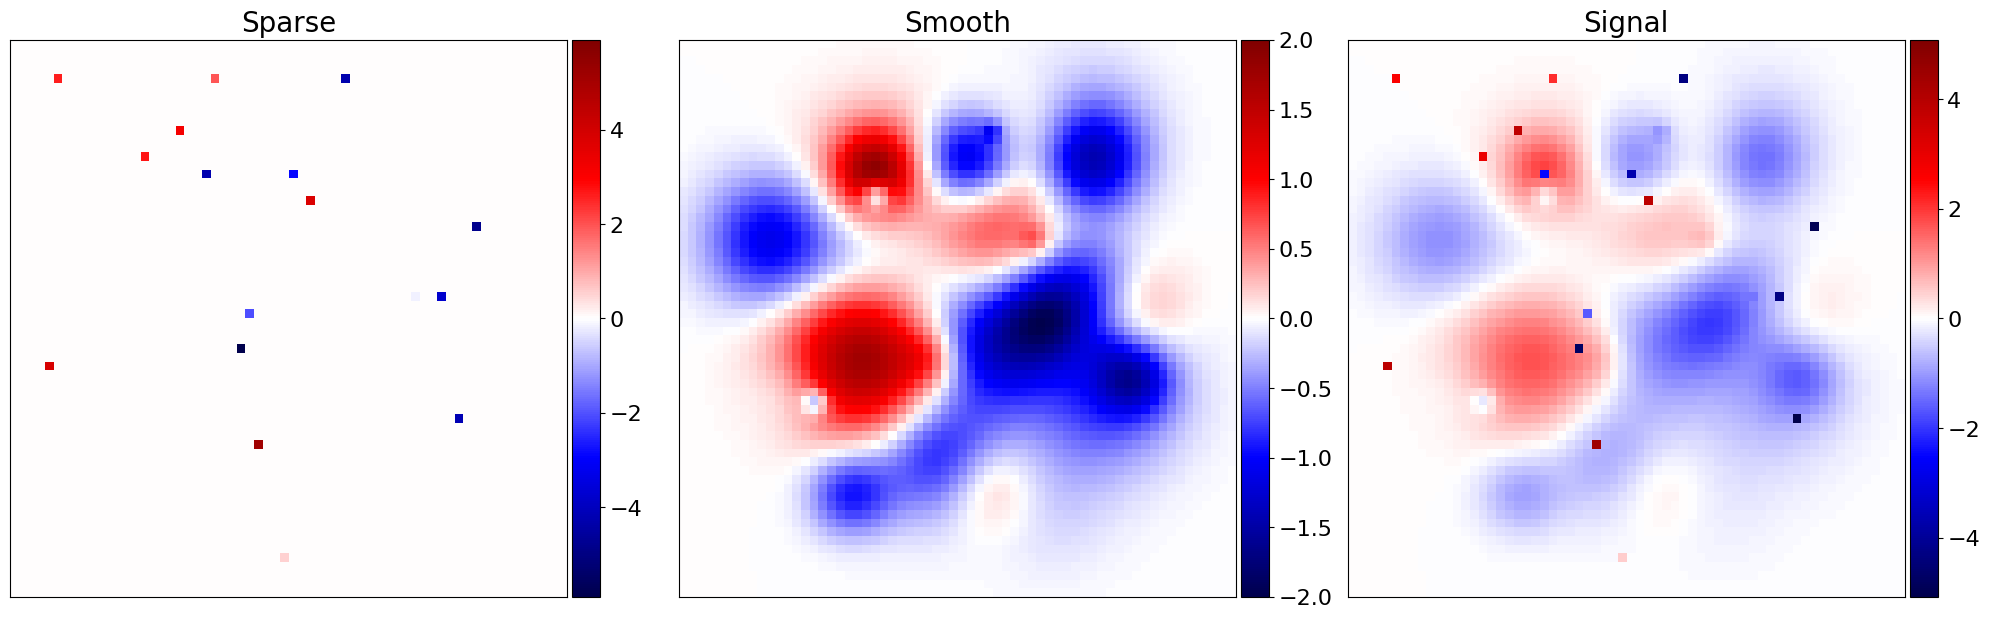

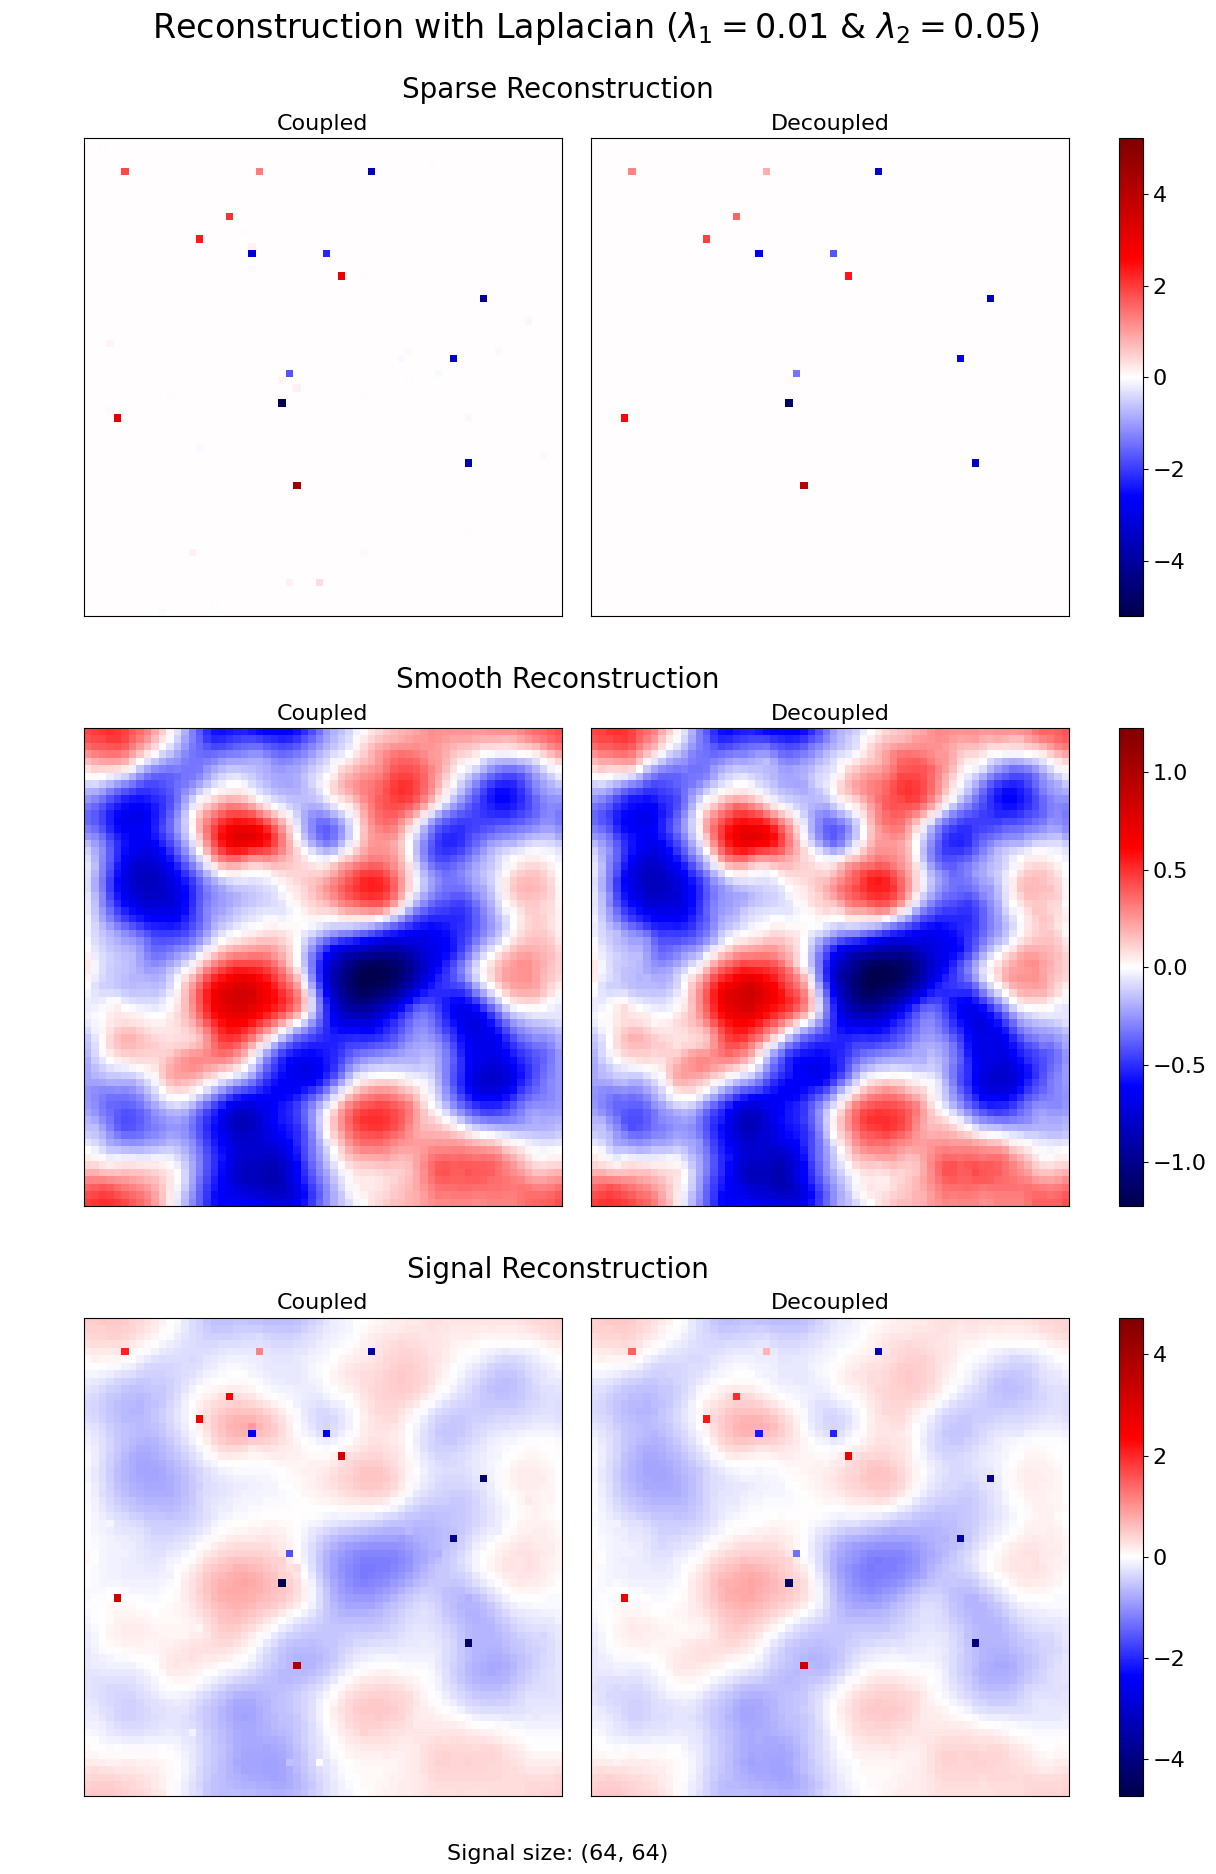

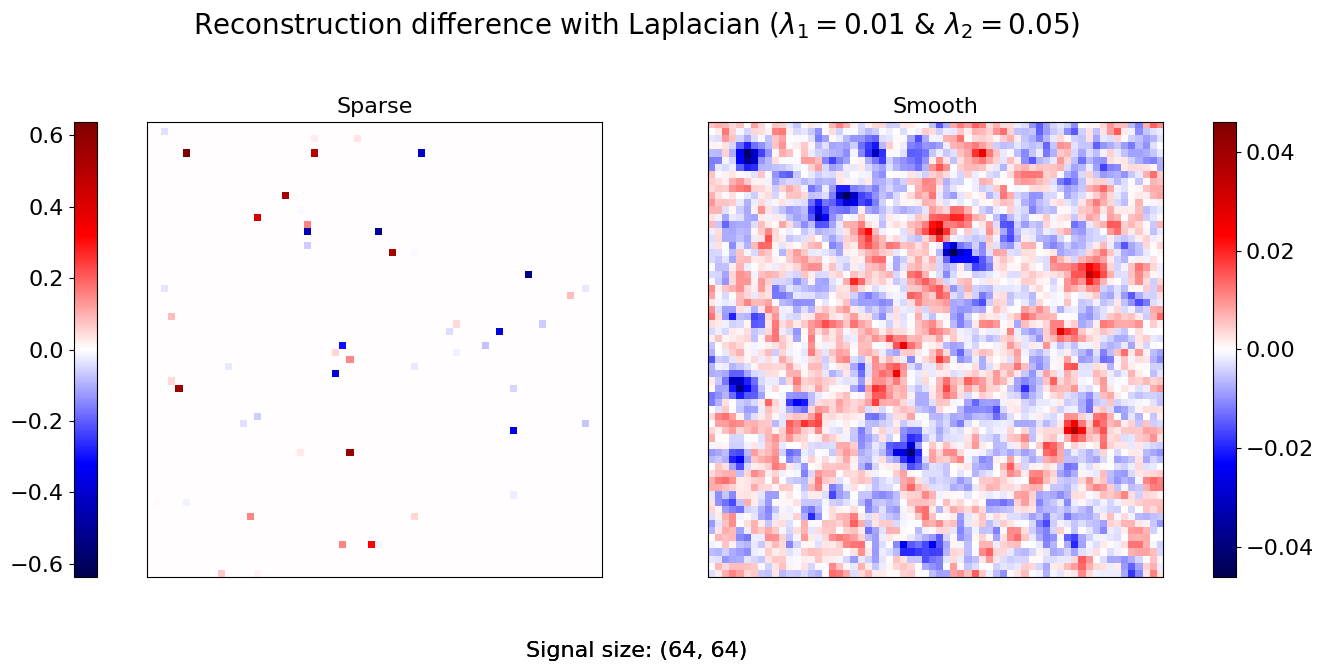

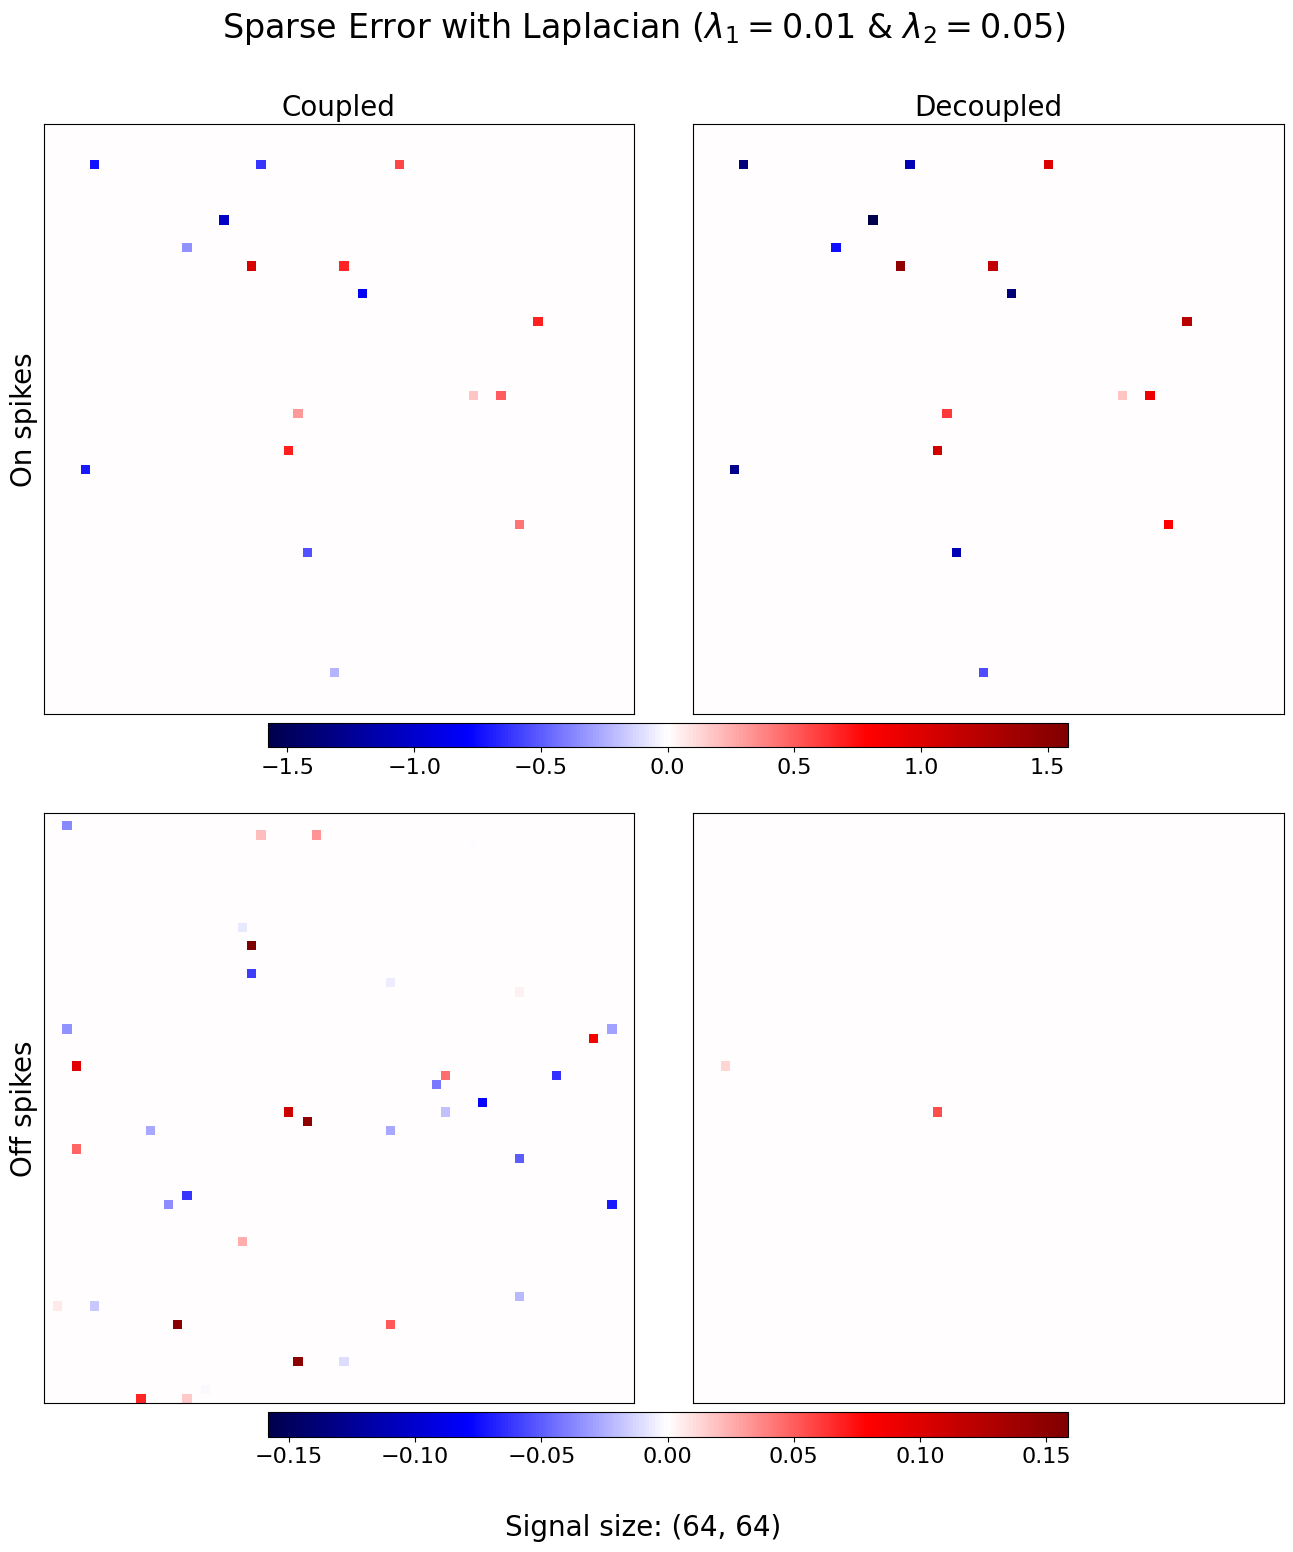

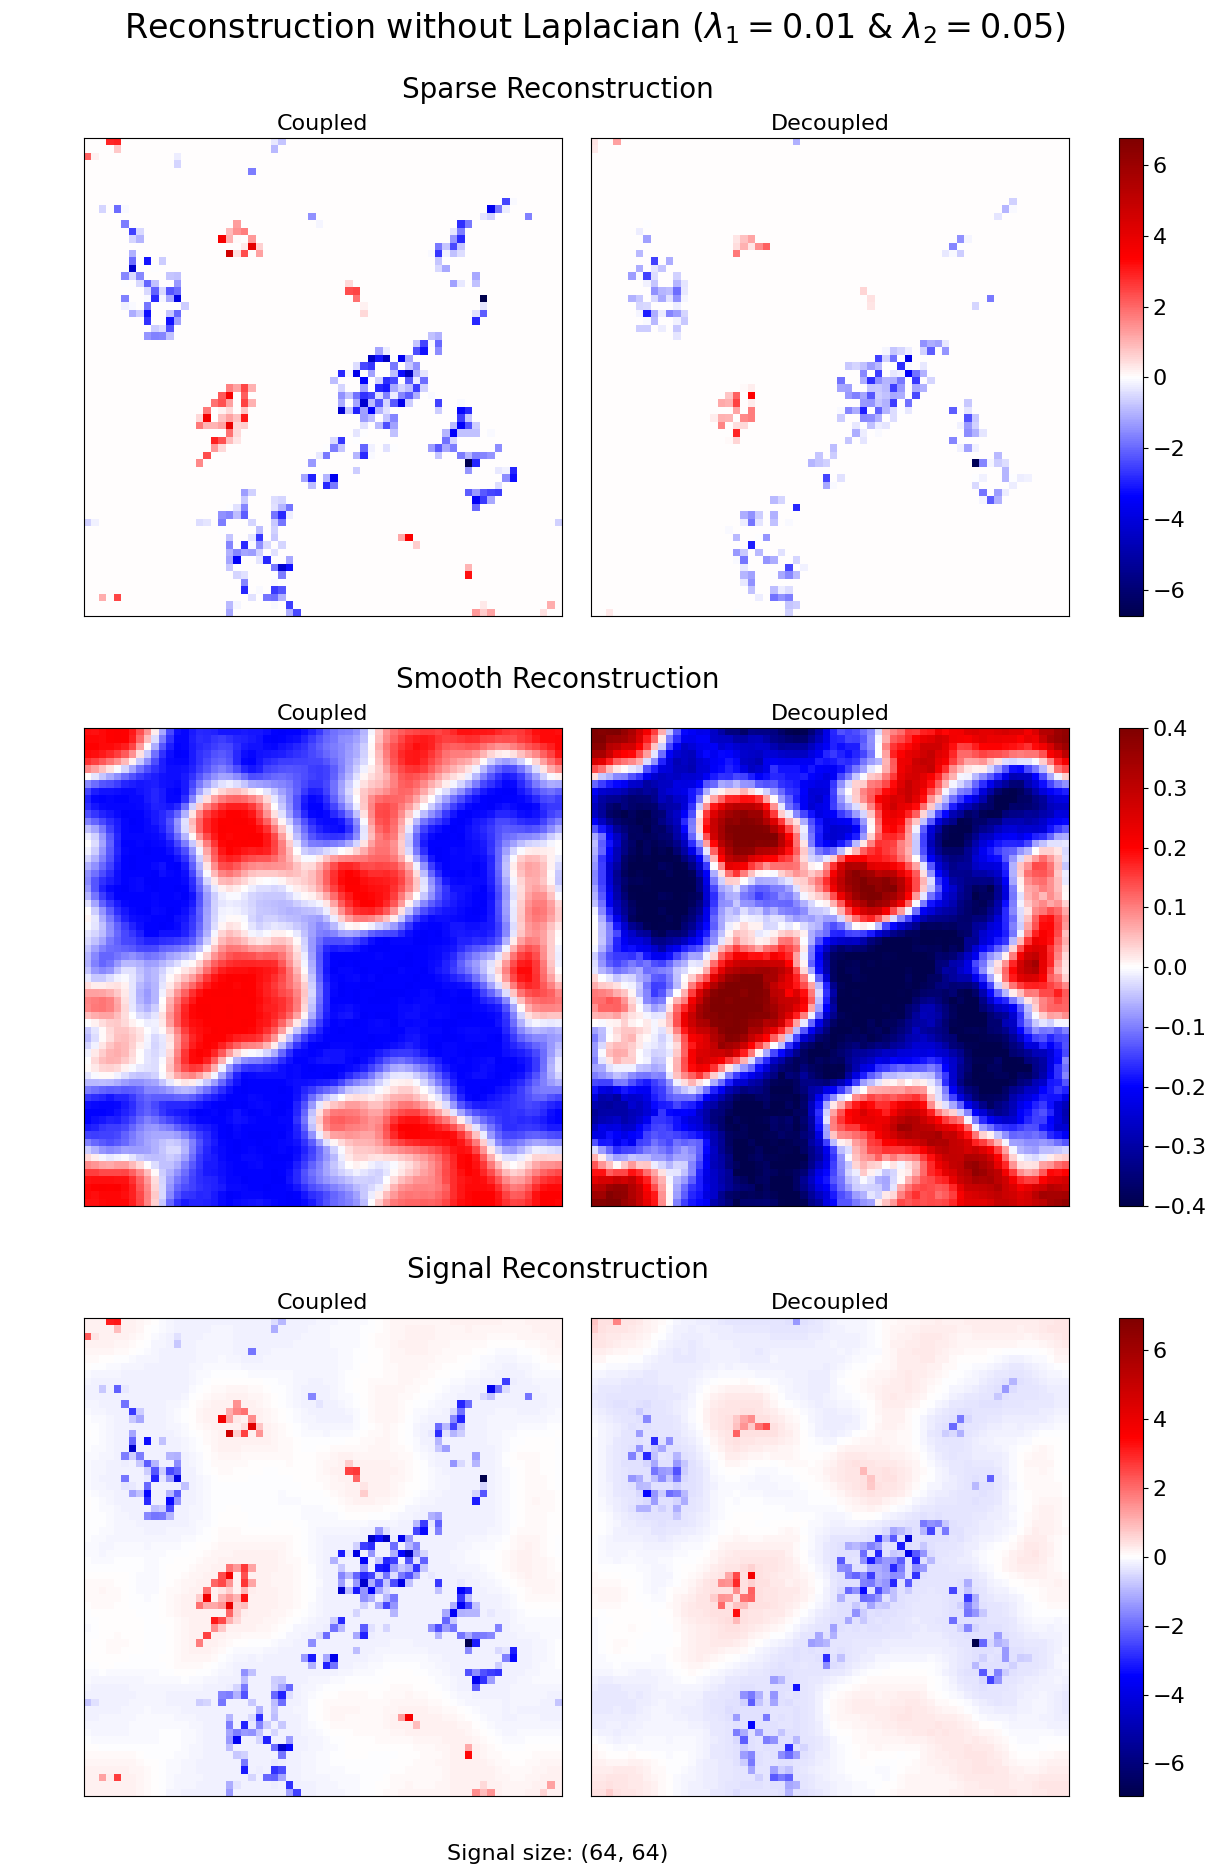

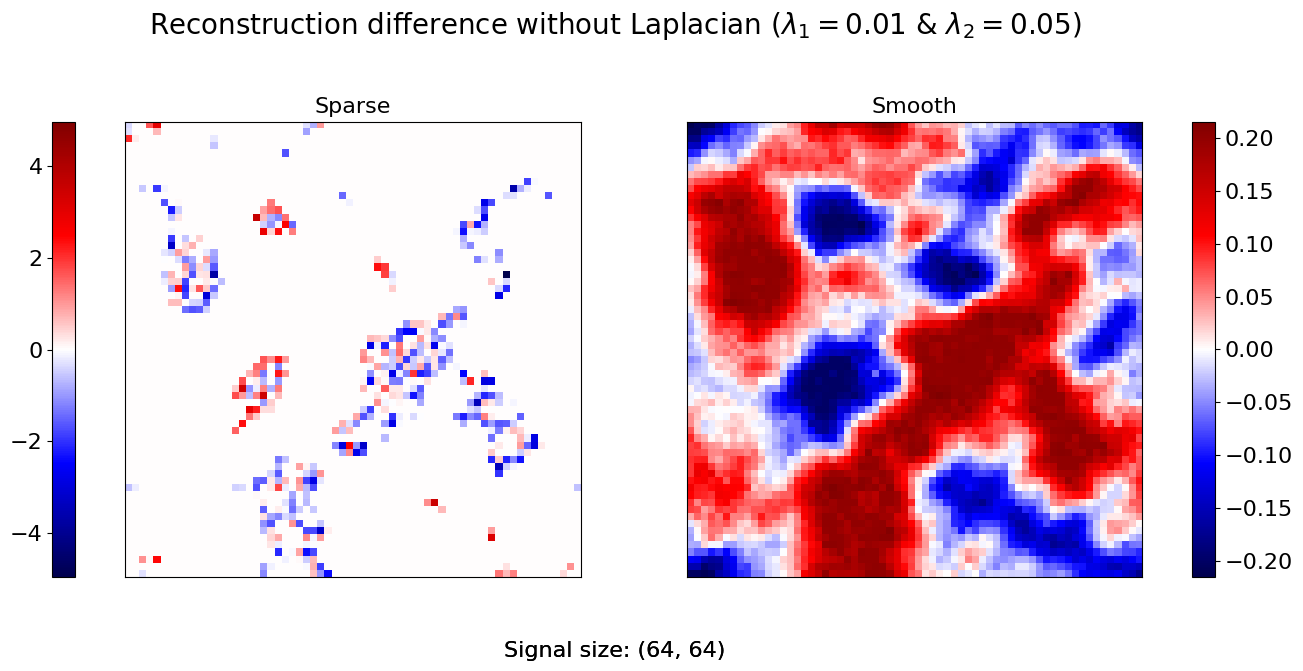

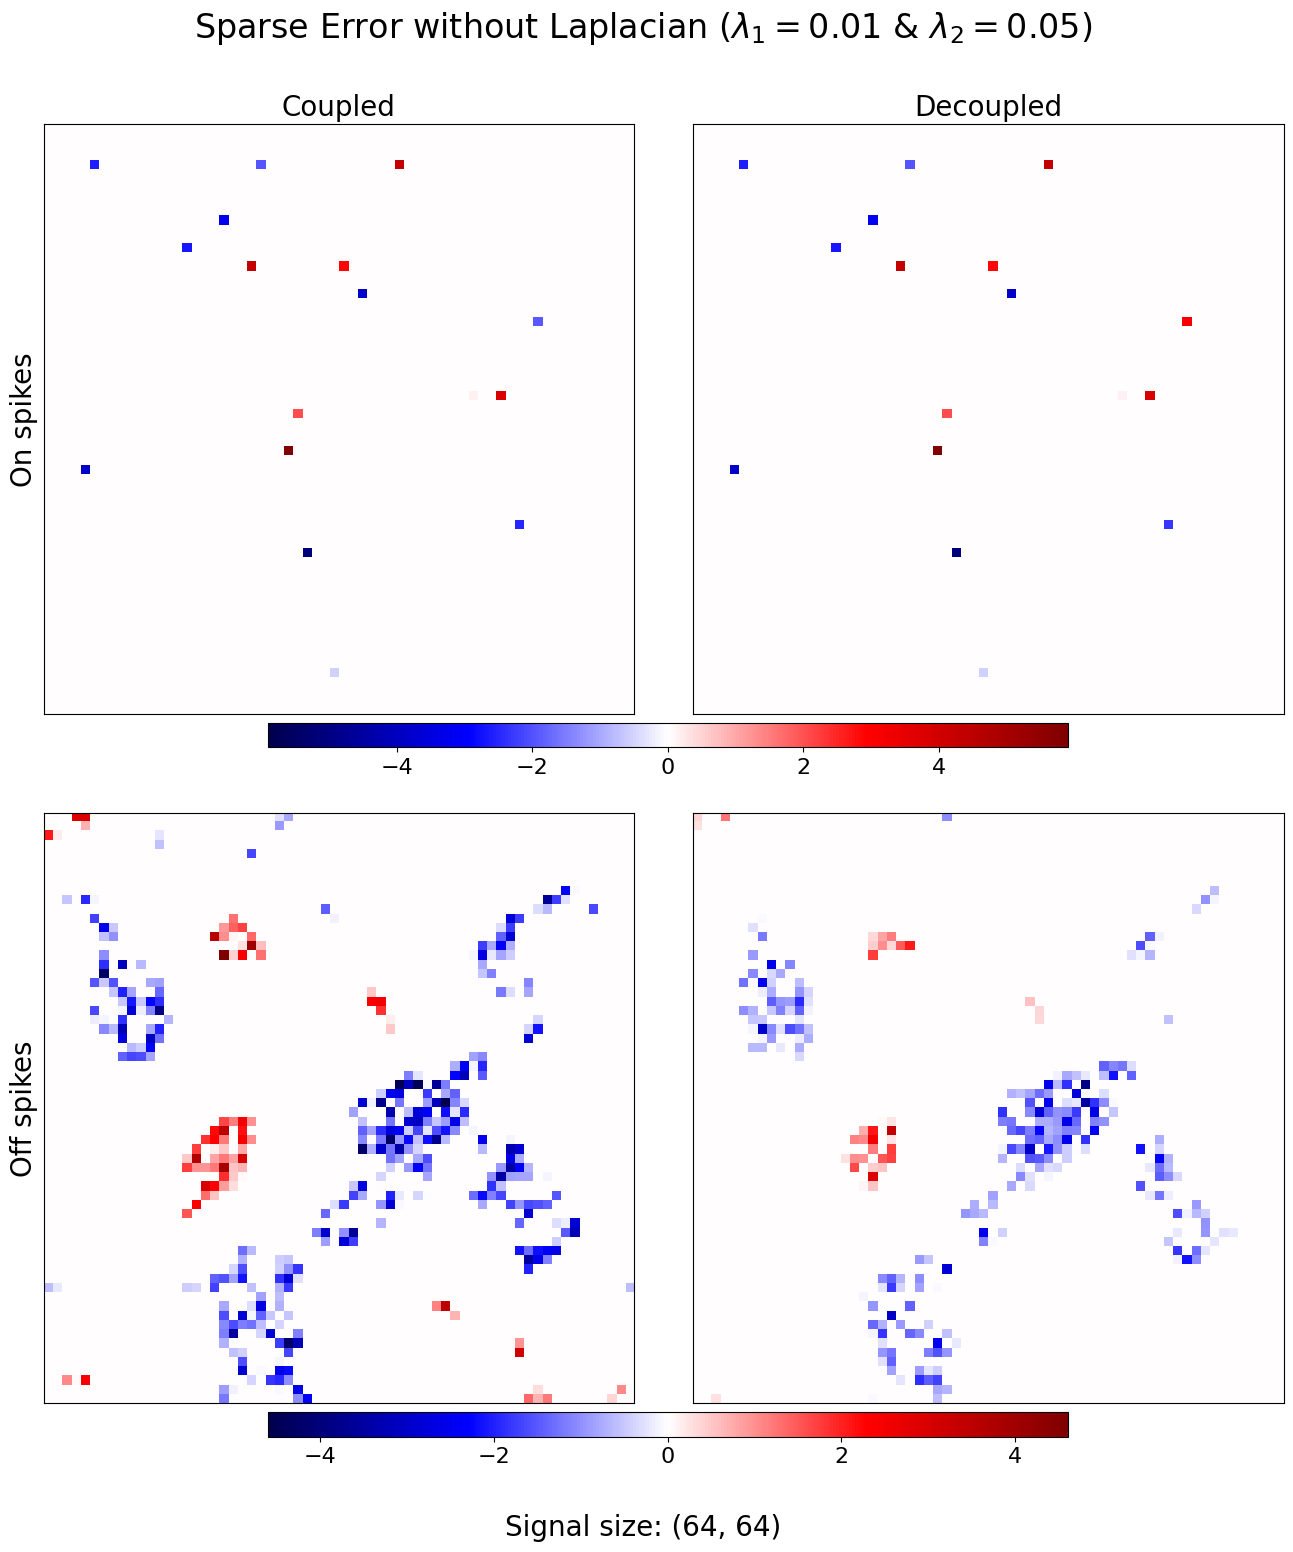

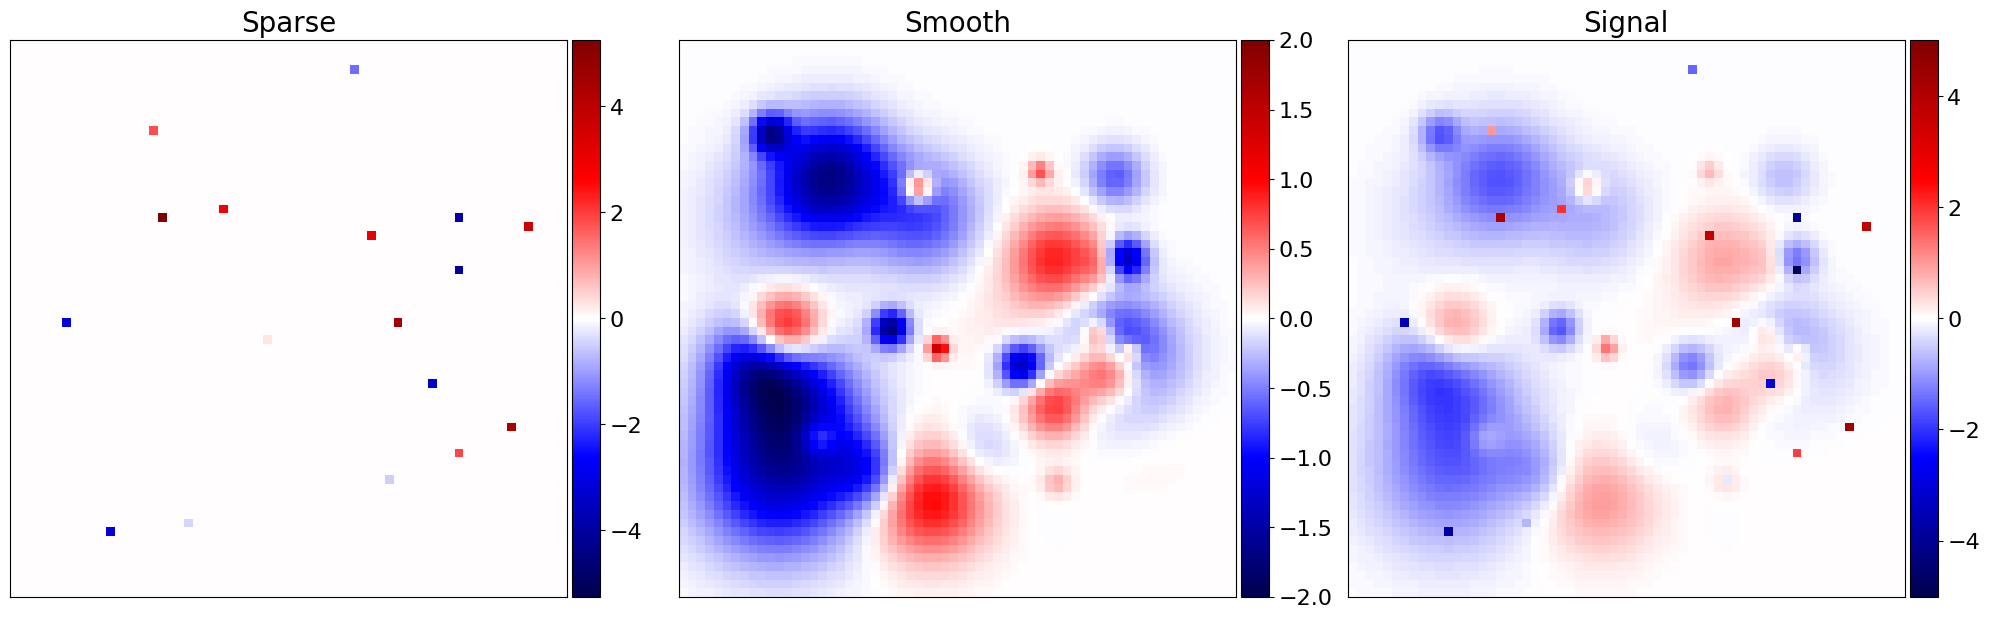

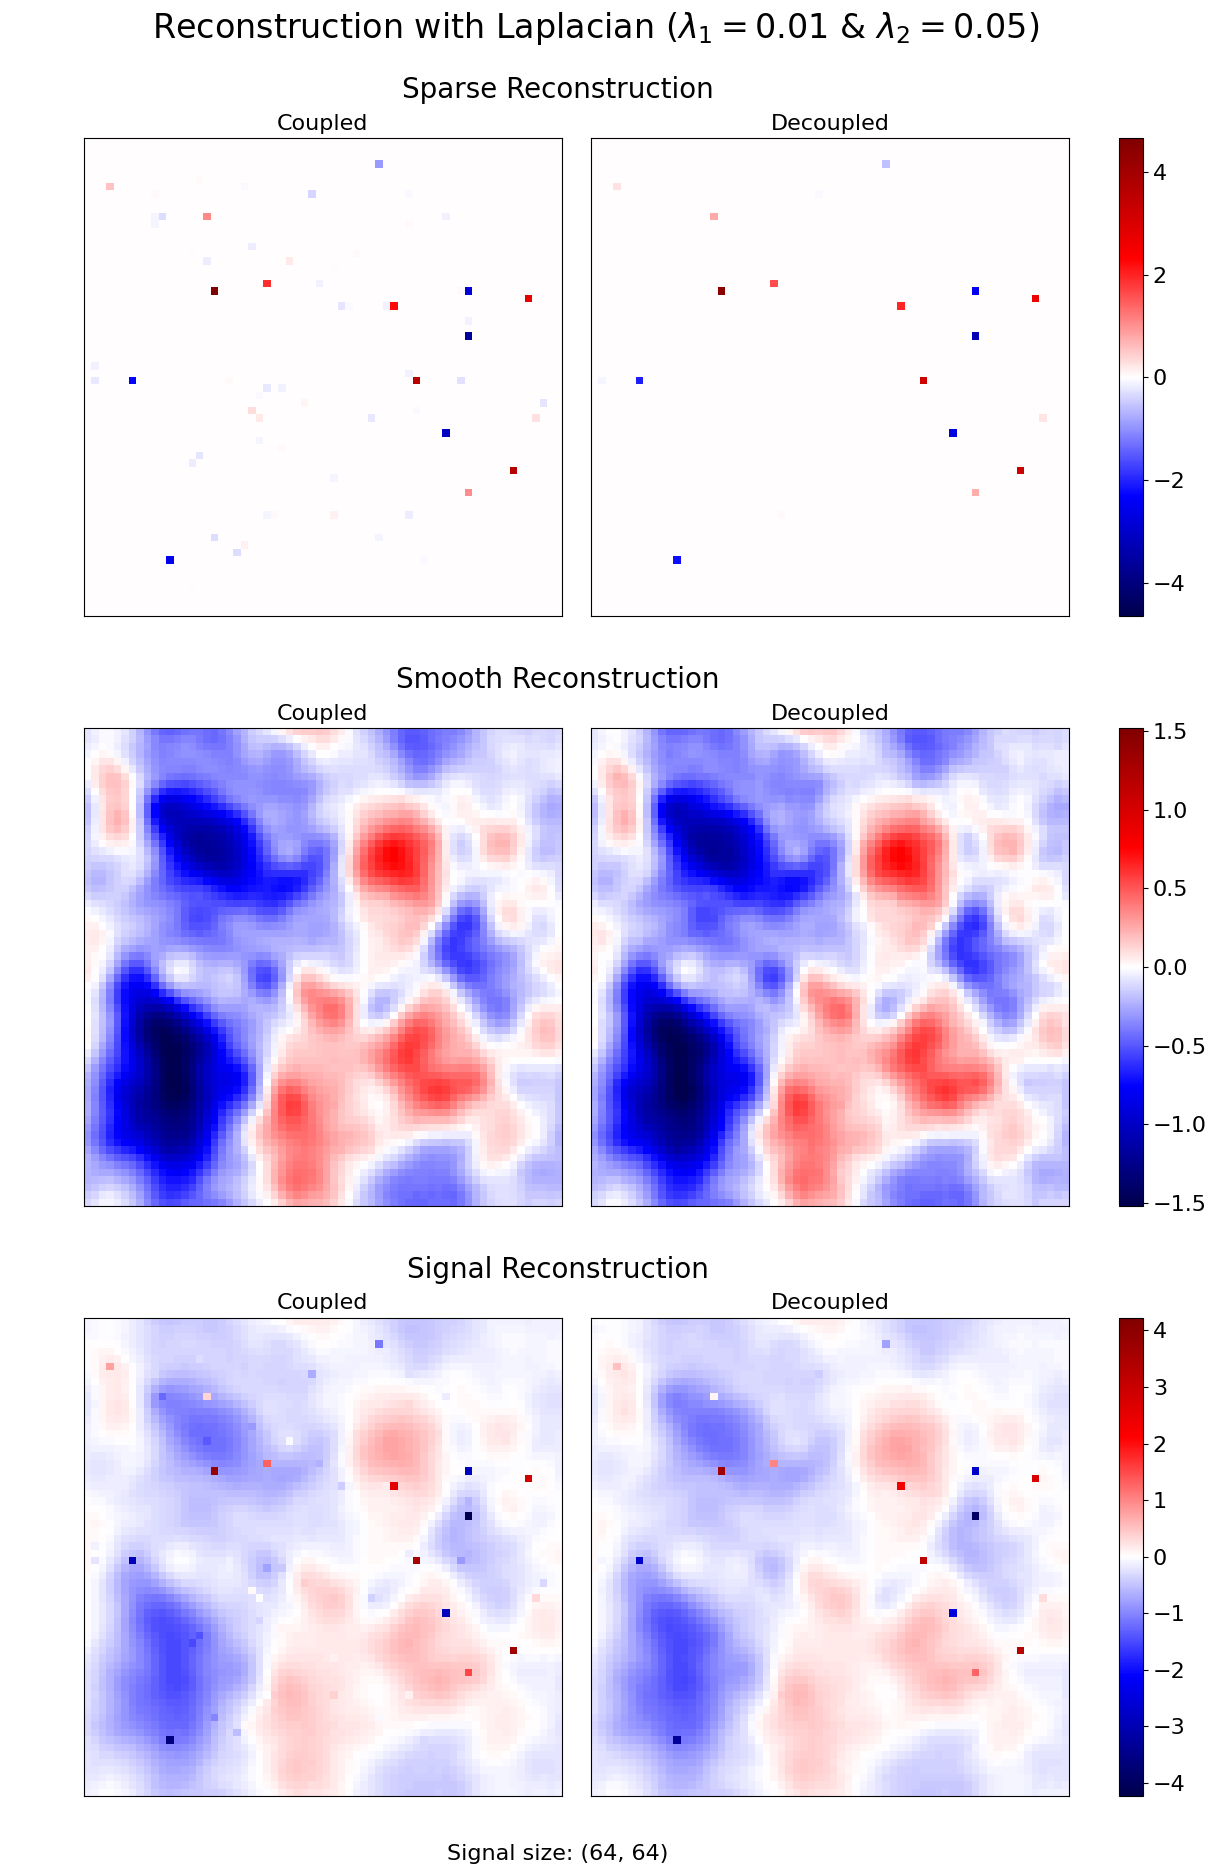

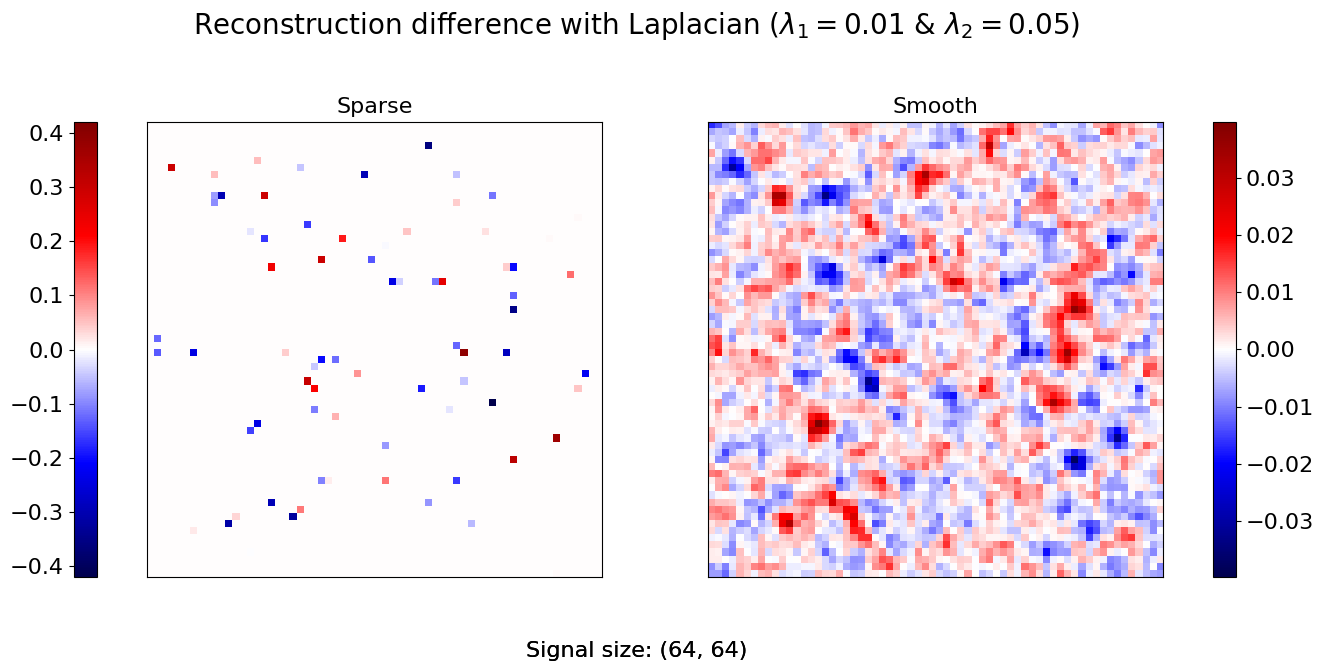

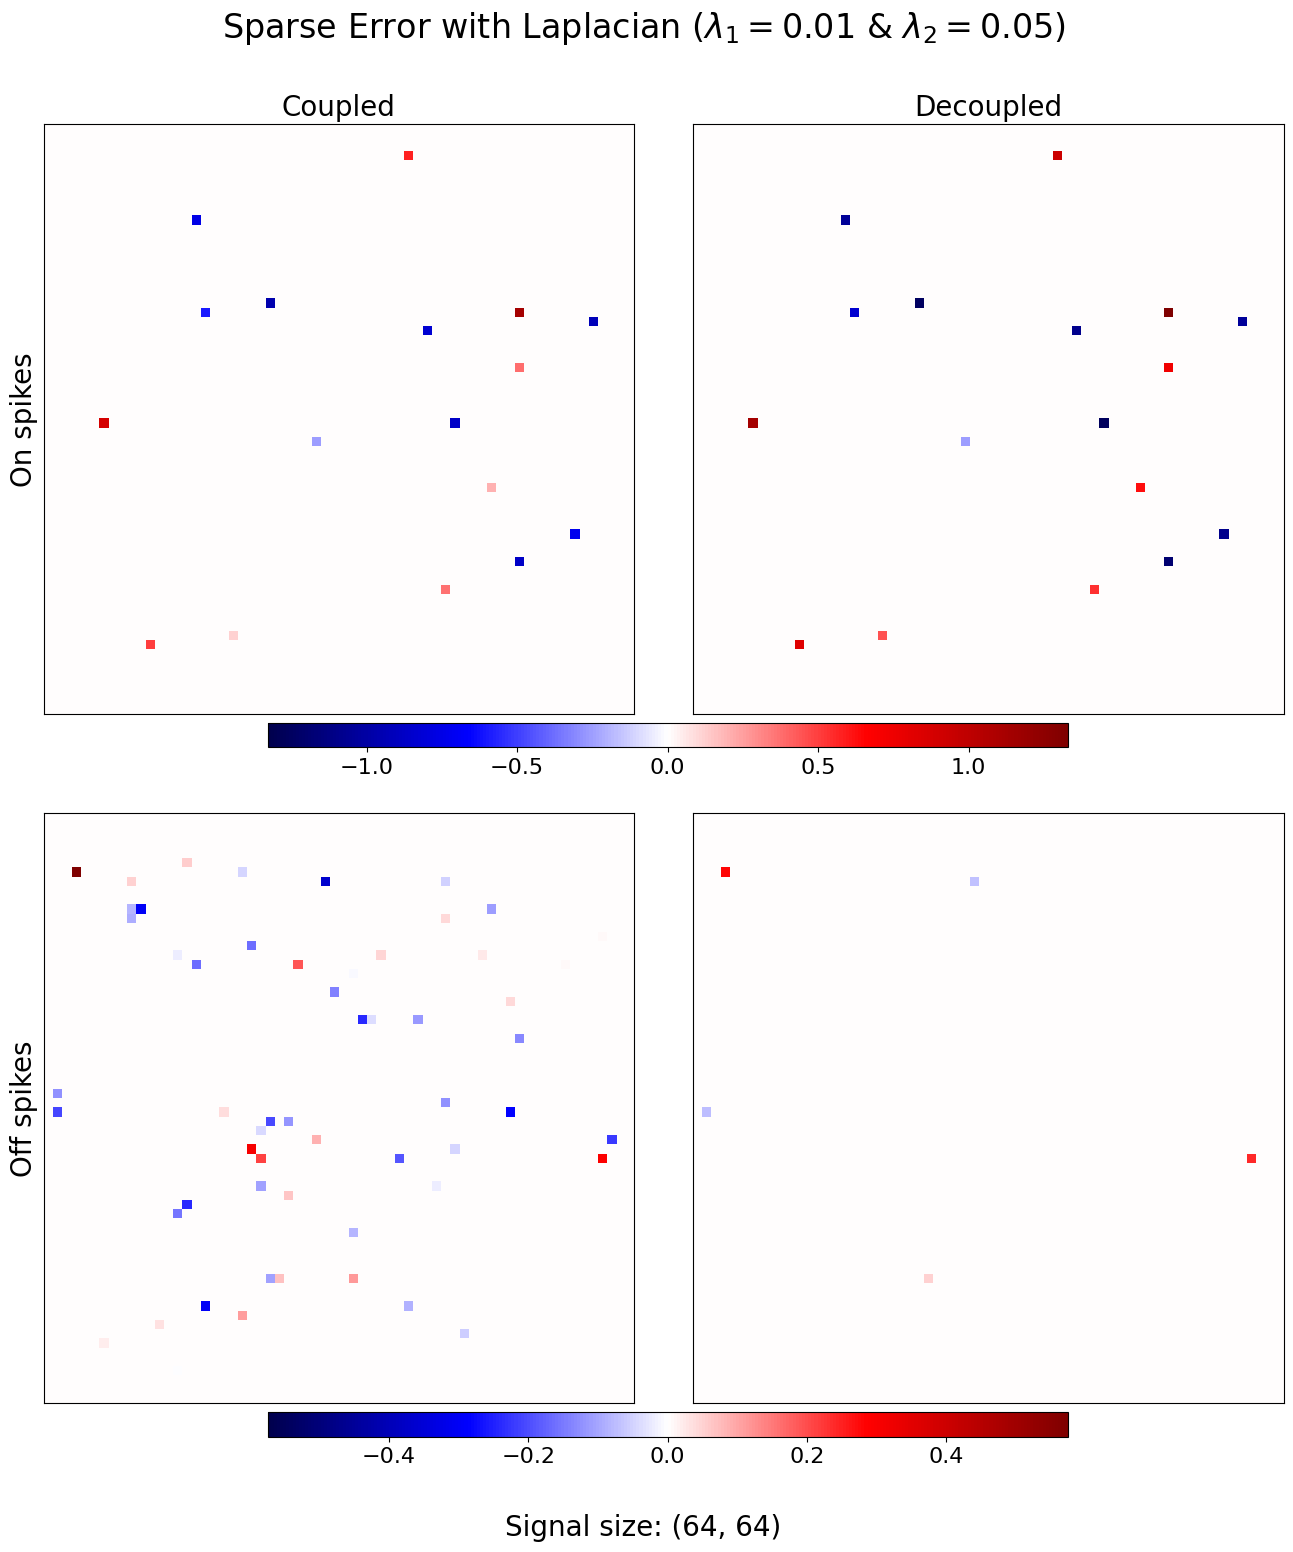

In [59]:
filename = "/tests.csv"
lambda1 = 1e-2
lambda2 = 5e-2

sparse_range = (-6, 6)
density = 0.005

smooth_amplitude = 2
sigmas_range = (2e-2, 2e-1)

L = 0.1
theta = 0.5
psnr = 50

for N in [64, 128, 256, 512]:
    laplacian_op = Laplacian((N, N), mode="wrap")
    nb_gaussian = int(0.5 * N)
    for seed in range(10):
        # Create signal
        sparse_signal = compute_sparse(N, sparse_range, density, seed)
        smooth_signal = compute_smooth(
            N, smooth_amplitude, sigmas_range, nb_gaussian, seed
        )
        signal = sparse_signal + smooth_signal

        fig_original_sig = plot_signal(sparse_signal, smooth_signal)
        directory_original_sig = EXP_PATH + f"/{N}/{seed}/"
        if not os.path.exists(directory_original_sig):
            os.makedirs(directory_original_sig)
        fig_original_sig.savefig(
            directory_original_sig+"original_signal", bbox_inches="tight"
        )
        # Create op
        op = NuFFT(N, L, theta, on_grid=True, seed=seed)
        x0 = signal.reshape(-1)
        y0 = op(x0)
        y = compute_y(y0, psnr)

        # Solve
        for laplacian in [True, False]:
            for coupled in [True, False]:
                start = time.time()
                x1, x2 = solve(y, op, lambda1, lambda2, coupled, laplacian)
                time_solve = time.time() - start
                (
                    sparse_rcstr,
                    smooth_rcstr,
                    signal_rcstr,
                ) = map(
                    lambda x: x.reshape((N, N)),
                    (x1, x2, x1 + x2),
                )
                cost = objective_func(
                    op,
                    laplacian_op,
                    y,
                    sparse_rcstr,
                    smooth_rcstr,
                    lambda1,
                    lambda2,
                )
                if coupled:
                    sparse_rcstr_coupled = sparse_rcstr.copy()
                    smooth_rcstr_coupled = smooth_rcstr.copy()
                    signal_rcstr_coupled = signal_rcstr.copy()
                write_to_csv(
                    filename,
                    [
                        seed,
                        N,
                        coupled,
                        laplacian,
                        lambda1,
                        lambda2,
                        time_solve,
                        *cost,
                    ],
                )

            # Compare
            fig_compare = compare(
                N,
                laplacian,
                lambda1,
                lambda2,
                sparse_rcstr_coupled,
                sparse_rcstr,
                smooth_rcstr_coupled,
                smooth_rcstr,
                signal_rcstr_coupled,
                signal_rcstr,
            )
            fig_diff = difference(
                N,
                laplacian,
                lambda1,
                lambda2,
                sparse_rcstr_coupled,
                sparse_rcstr,
                smooth_rcstr_coupled,
                smooth_rcstr,
            )
            fig_sparse = sparse_error(
                N,
                laplacian,
                lambda1,
                lambda2,
                sparse_signal,
                sparse_rcstr_coupled,
                sparse_rcstr,
            )
            PATH = EXP_PATH + f"/{N}/{seed}/{str("laplacian" if laplacian else "nolaplacian")}/"
            
            if not os.path.exists(PATH):
                os.makedirs(PATH)
            for fig, file in zip(
                [fig_compare, fig_diff, fig_sparse],
                ["comparison", "difference", "sparse_error"],
            ):
                fig.savefig(PATH + file, bbox_inches="tight")

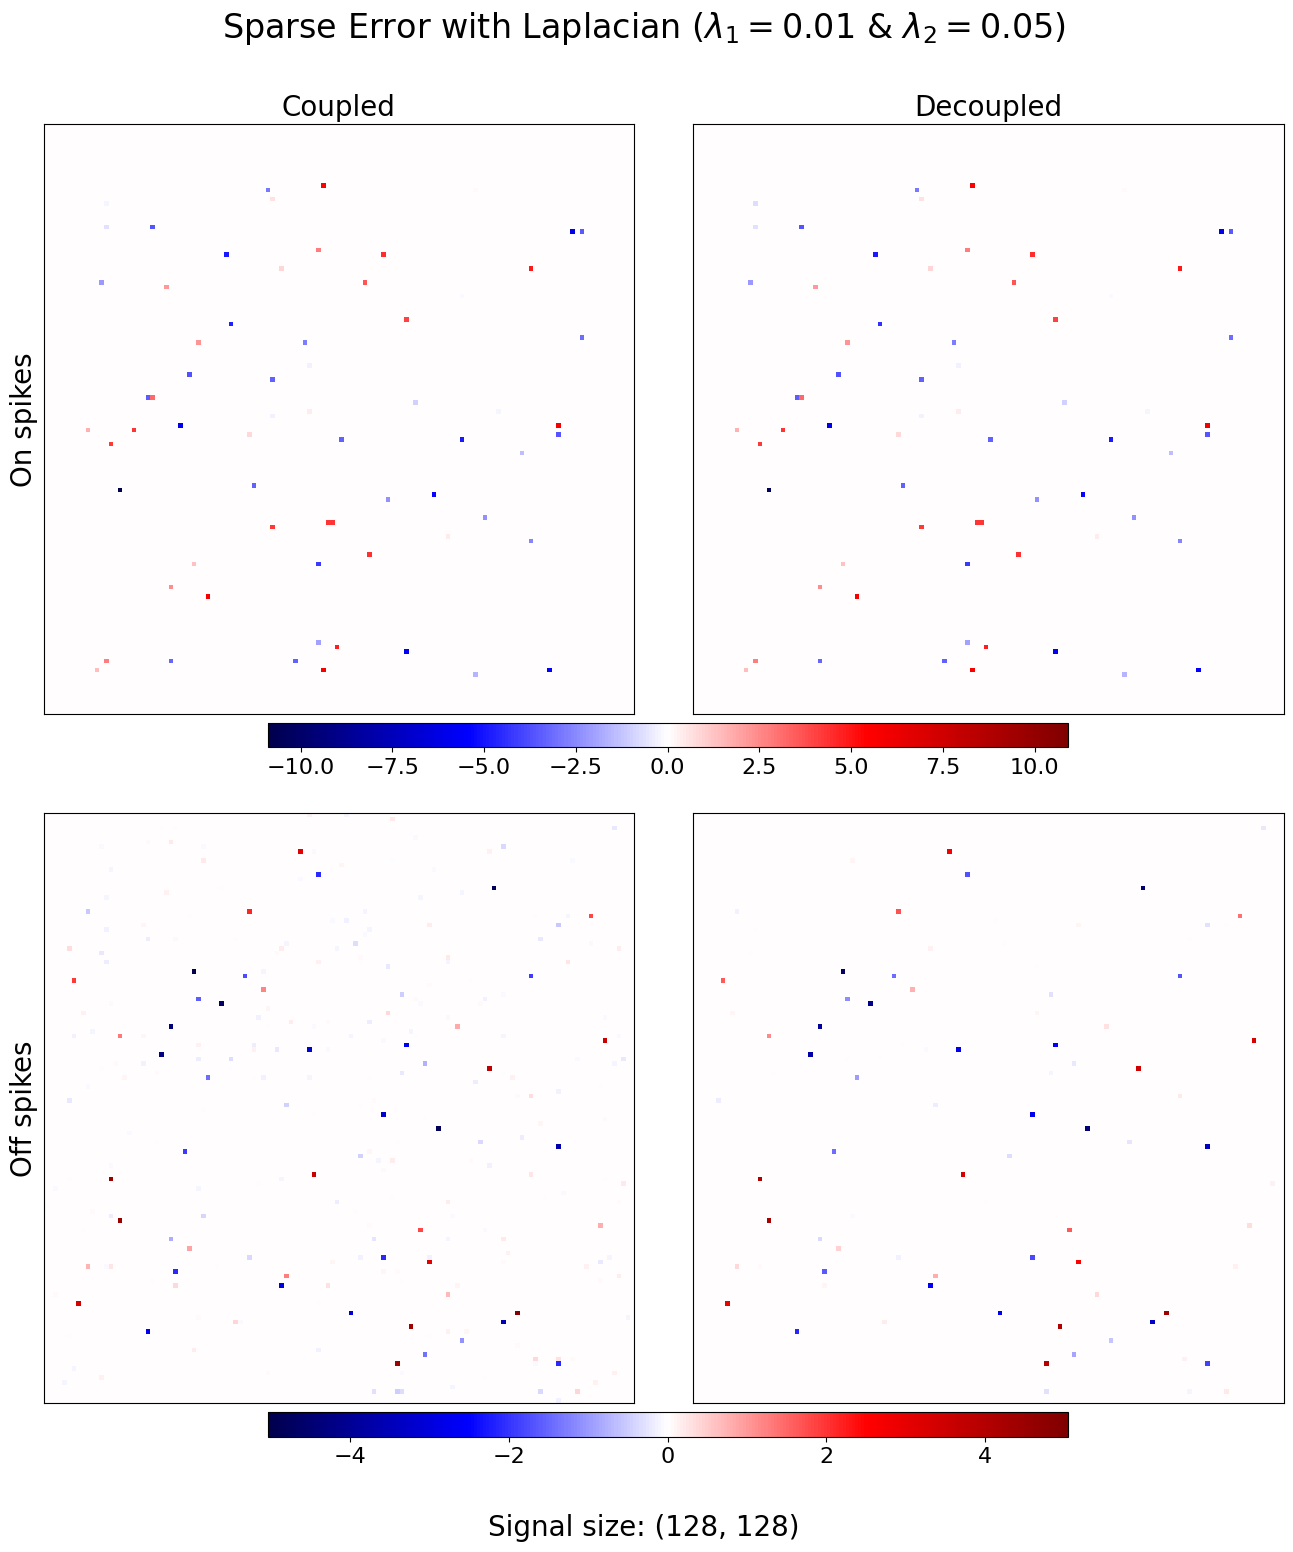

In [50]:
fig_sparse =sparse_error(
    N,
    laplacian,
    lambda1,
    lambda2,
    sparse_signal,
    sparse_rcstr_coupled,
    sparse_rcstr_decoupled,
)

fig_sparse.savefig("a", bbox_inches="tight")